https://www.learnpytorch.io/03_pytorch_computer_vision/

# Getting started:

## What is Computer Vision

1. Binary Classification (one thing or another)
2. Multiclass Classification (more than 1 thing or another)

## What are we going to cover

* Getting a vision dataset to work with
* Architecture of a convolutional neural network(CNN) with PyTorch
* An end-to-end multi-class image classification problem
* Steps in Modeling with CNNs in PyTorch
    * Creating a CNN model with PyTorch
    * Pickinga loss and optimizer
    * Training a model
    * Evaluating a model
* identifying where a car appears in a video framme(object detection)
* figuring out wehre different objects in an image can be separated. (panoptic 展示全景的 sgmentation)

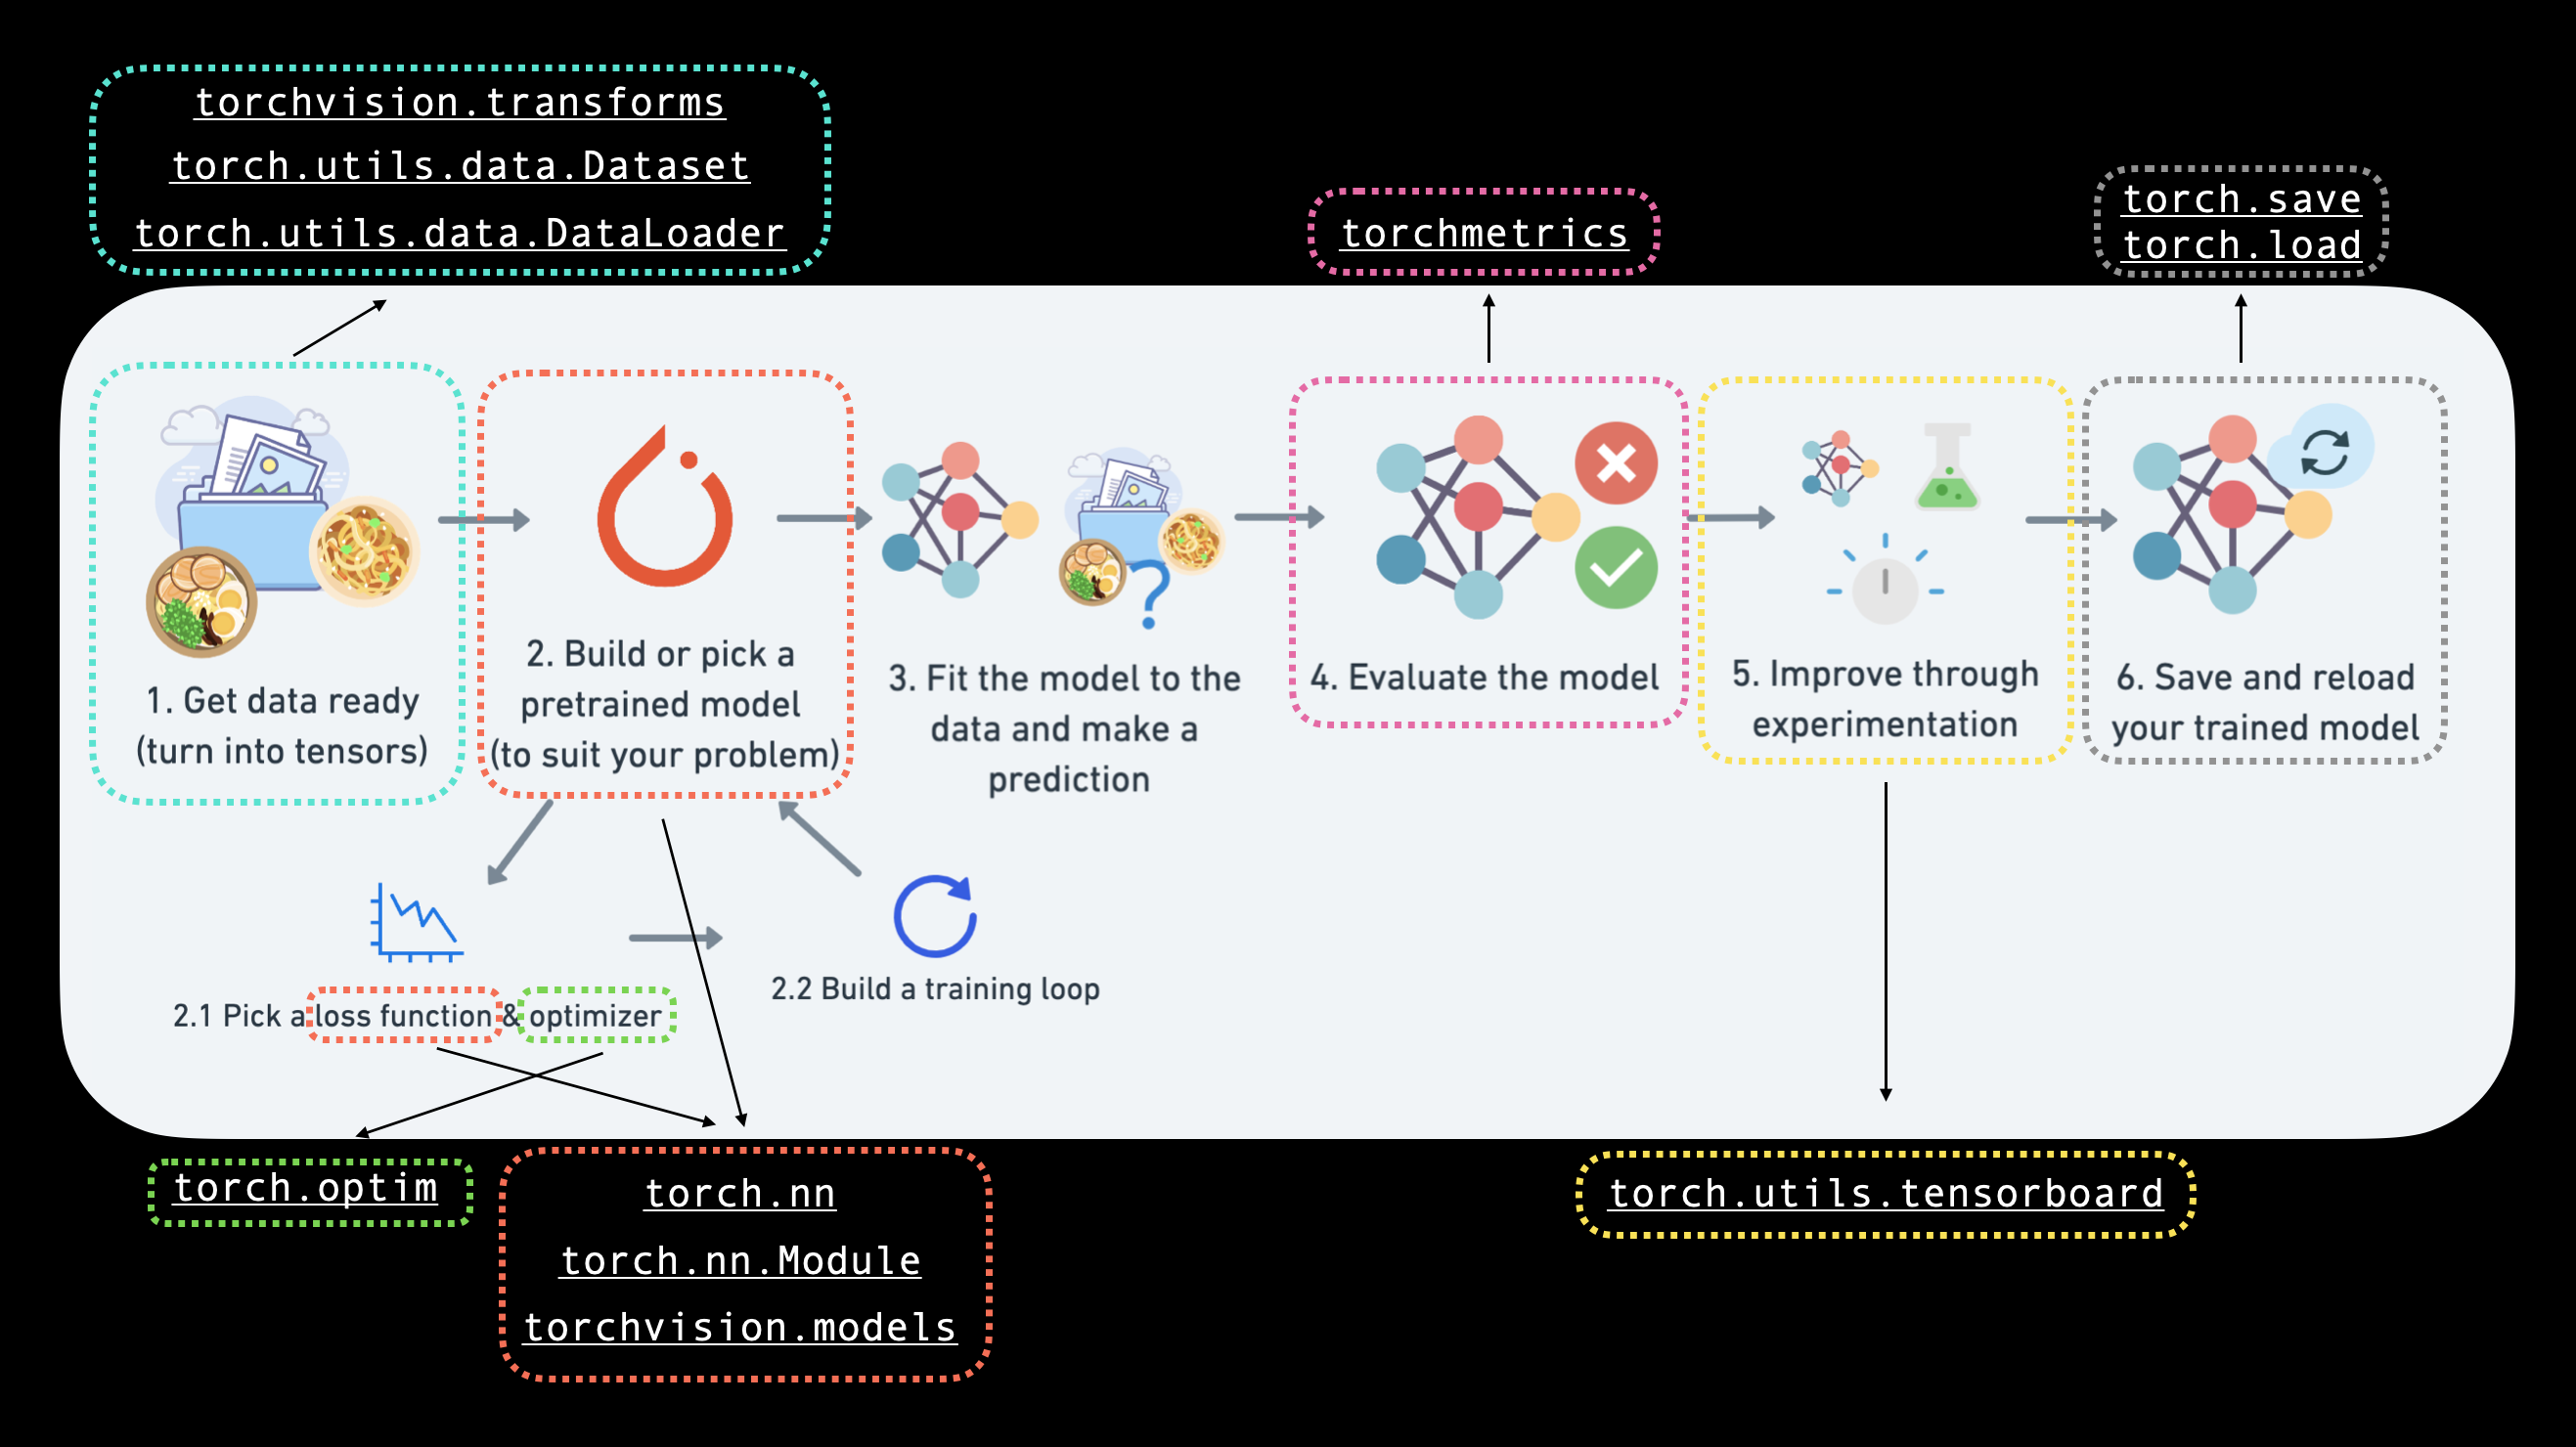

Specifically, we're going to cover:

| **Topic** | **Contents** |
| ----- | ----- |
| **0. Computer vision libraries in PyTorch** | PyTorch has a bunch of built-in helpful computer vision libraries, let's check them out.  |
| **1. Load data** | To practice computer vision, we'll start with some images of different pieces of clothing from [FashionMNIST](https://github.com/zalandoresearch/fashion-mnist). |
| **2. Prepare data** | We've got some images, let's load them in with a [PyTorch `DataLoader`](https://pytorch.org/docs/stable/data.html) so we can use them with our training loop. |
| **3. Model 0: Building a baseline model** | Here we'll create a multi-class classification model to learn patterns in the data, we'll also choose a **loss function**, **optimizer** and build a **training loop**. | 
| **4. Making predictions and evaluating model 0** | Let's make some predictions with our baseline model and evaluate them. |
| **5. Setup device agnostic code for future models** | It's best practice to write device-agnostic code, so let's set it up. |
| **6. Model 1: Adding non-linearity** | Experimenting is a large part of machine learning, let's try and improve upon our baseline model by adding non-linear layers. |
| **7. Model 2: Convolutional Neural Network (CNN)** | Time to get computer vision specific and introduce the powerful convolutional neural network architecture. |
| **8. Comparing our models** | We've built three different models, let's compare them. |
| **9. Evaluating our best model** | Let's make some predictions on random images and evaluate our best model. |
| **10. Making a confusion matrix** | A confusion matrix is a great way to evaluate a classification model, let's see how we can make one. |
| **11. Saving and loading the best performing model** | Since we might want to use our model for later, let's save it and make sure it loads back in correctly. |

## Inputs and Outputs

Inputs are usually a picture of some sorts: 
- batch_size, H x W x C(color channels - RGB) get represented as a tensor. 
- 32 is a very common batch size.

eg: Shape = [32,224,224,3]


Converts Colors to Number (Numerical Encoding) -> the inputs of the algorighm 

Outputs-> prediction probability for each case. The highest number gives you the perdicted output. 

Output Shape = [3] -> assuming 3 classes

Convolutional Neural network (CNN) is often the ML algorithm that works well with pictures. 
Transformer is also another type of algorithm that recently developped and works well with pictures.  

## The architecture of CNN

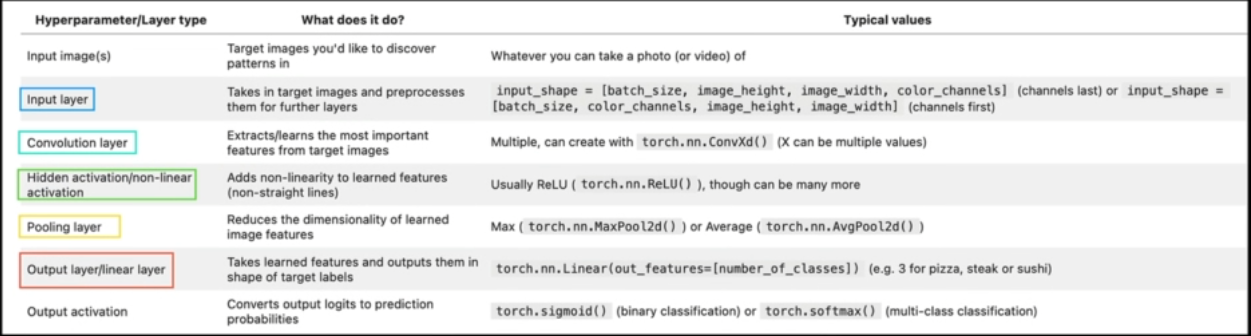

* the above architecture only represents one of the way you can stack a CNN...  

## 0. Computer vision libaries in PyTorch

* `torchvision` - base domain library for PyTorch computer vision
* `torchvision.datasets` - get datasets and data loading functions for computer vision here
* `torchvision.models` - get pretrained computer vision models (models has already been trained) that you can leverage for your own problem.
* `torchvision.transforms` - functions for manipulating your vision data(images) to be suitable for use with an ML model(eg. turn images to numbers)

* `torch.utils.data.Dataset` - base dataset class for PyTorch.
* `torch.ultils.data.DataLoader` - creates a python iterable over a dataset




In [1]:
# import PyTorch
import torch
from torch import nn

# import torchvision
import torchvision
from torchvision import transforms, datasets
from torchvision.transforms import ToTensor # converting PLT images to numpy.ndarry tensors..

#import matplotlib for visualization
import matplotlib.pyplot as plt

# check PyTorch version
print(torch.__version__)
print(torchvision.__version__)

2.9.0+cu128
0.24.0+cu128


## 1. Getting a dataset

the dataset we'll be using FashingMNIST -> MNIST,
MNIST - larget data set of handwritten digits. 

There are built-in data set under PyTorch, MNIST is one of them. 
https://docs.pytorch.org/vision/main/datasets.html


In [2]:
# Setup training data
train_data = datasets.FashionMNIST(
    root="data", # where to download the data
    train=True, # do we want training data sets or testing data sets
    download=True,
    transform=ToTensor(), # converting PLT images to numpy.ndarry tensors..
    target_transform=None # how do we want to transform the labels/targets
)

test_data = datasets.FashionMNIST(
    root="data", # where to download the data
    train=False, # do we want training data sets or testing data sets
    download=True,
    transform=ToTensor(), # converting PLT images to numpy.ndarry tensors..
    target_transform=None # how do we want to transform the labels/targets
)

100%|██████████| 26.4M/26.4M [00:02<00:00, 13.0MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 202kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.76MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 12.3MB/s]


### 1.1 Check input/output and other properties of our data

In [3]:
len(train_data), len(test_data)
#how many training data/test data we have


(60000, 10000)

In [4]:
# See the first training example
image,label = train_data[0]
image,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
class_names= train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
class_to_idx = train_data.class_to_idx
class_to_idx
# we will have output shape of 10 - 10 classes

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [7]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [8]:
# check the shape of our immage
print(f"Image shape: {image.shape}") # 1,28,28 (channels, height, width)
print(f"Label: {label}") # 9
# we can see that the image is in grayscale because it has 1 channel
# image shape is 28x28 pixels, 1 color channel

Image shape: torch.Size([1, 28, 28])
Label: 9


### 1.2 Visualizing our data

Image shape: torch.Size([1, 28, 28])


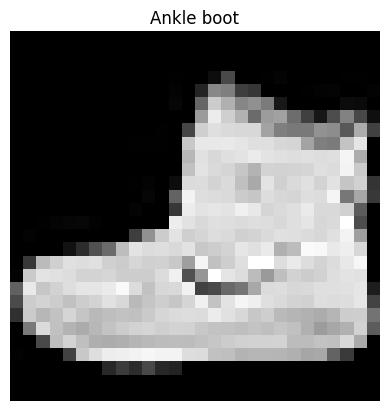

In [9]:
import matplotlib.pyplot as plt

image,label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False);

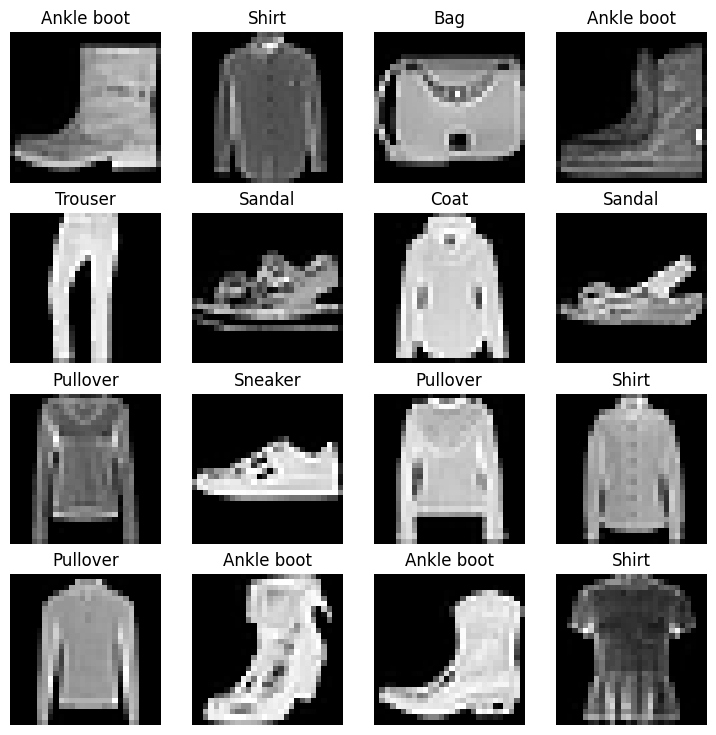

In [10]:
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4,4

for i in range(1,rows*cols +1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    #print(random_idx)
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i) # add subplot
    
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False)

Do you think these items of clothing(images) could be modelled with pure linear lines? or do you think we'll need non-linearities.

## 2. Prepare Dataloader 

Right now, our data is in the form of PyTorch Datasets,

DataLoader turns our dataset into Python iterable. 
More specifically, we want to turn our data into batches(or mini-batches)

Why would we do this? 
- More efficient... when the data size gets larger, it's going to take a lot of memory/computing power from the computer to compute everything all at once. Therefore, we usually break down a larget test size into batches.  We breakdown 60000 into 32 images at a time(batch size of 32)

- It gives our neural network more chances to update its gradient per epoch. Otherwise if we are looking at all data at once, we can only update parameter once ( 1 epoch)



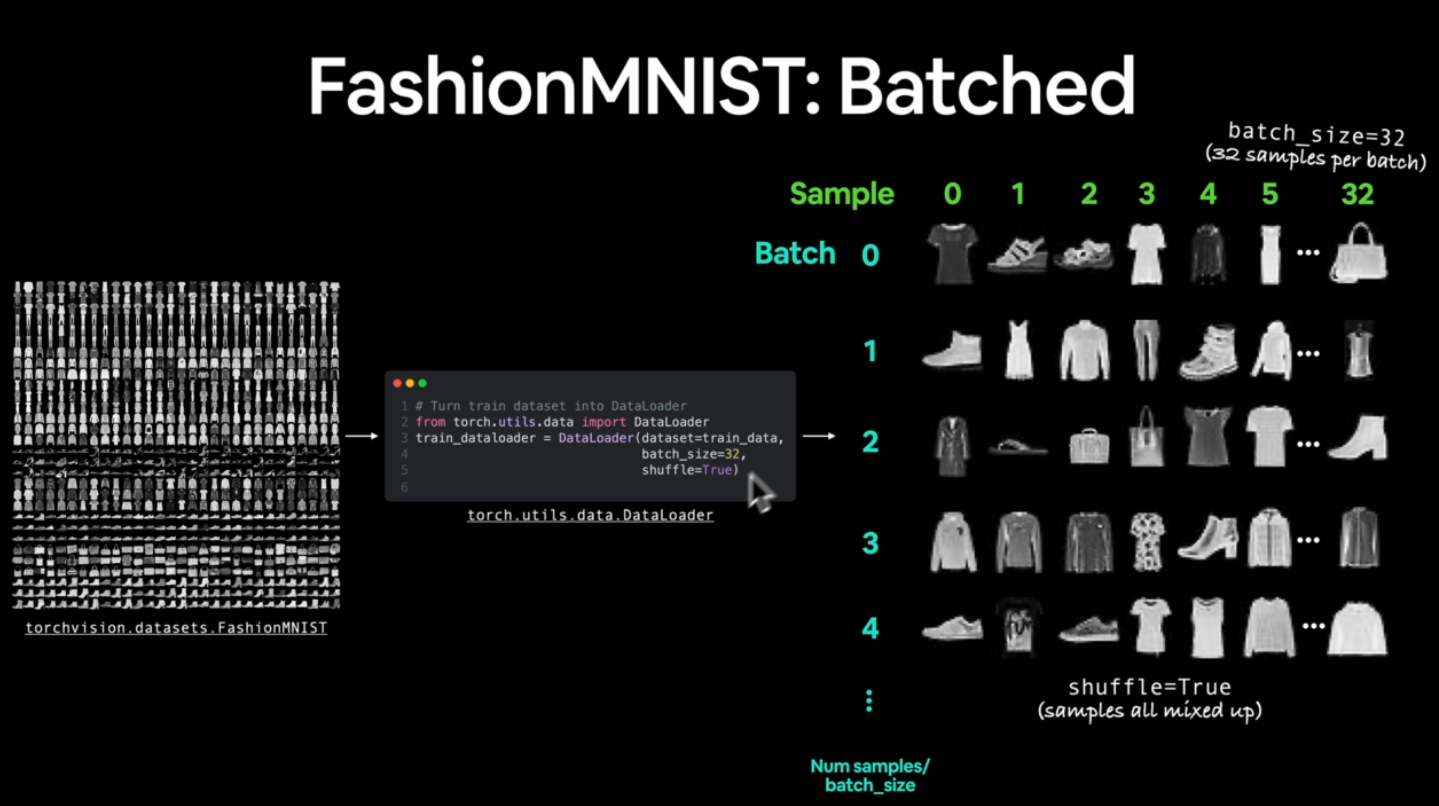

In [11]:
from torch.utils.data import DataLoader 
BATCH_SIZE = 32

# Turn datasets into iterables(batches)
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True) #the meaning of shuffle is such that our model doesn't learn the order.

test_dataloader = DataLoader(dataset=test_data,
                                batch_size=BATCH_SIZE,
                                shuffle=False) # you can shuffle, but testing data is usually not shuffled

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7c27d5200e00>,
 <torch.utils.data.dataloader.DataLoader at 0x7c27d7e02840>)

In [12]:
# Let's check out what we have created
import test


print(f"DataLoader: {train_dataloader,test_dataloader}")
print(f"Length of the train_dataloader: {len(train_dataloader)} batches  {BATCH_SIZE}")
print(f"Length of the test_dataloader: {len(test_dataloader)} batches  {BATCH_SIZE}")

DataLoader: (<torch.utils.data.dataloader.DataLoader object at 0x7c27d5200e00>, <torch.utils.data.dataloader.DataLoader object at 0x7c27d7e02840>)
Length of the train_dataloader: 1875 batches  32
Length of the test_dataloader: 313 batches  32


In [13]:
# Check out what's inside the training dataload
train_features_batch, train_labels_batch = next(iter(train_dataloader)) 
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28]), Label: 6


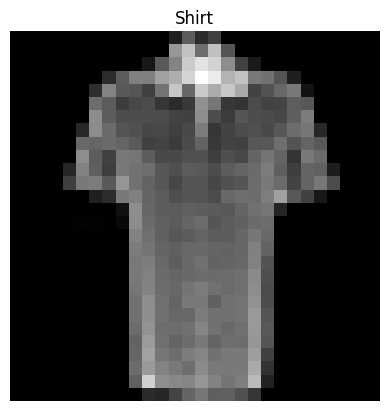

In [14]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img,label = train_features_batch[random_idx], train_labels_batch[random_idx]

plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {img.shape}, Label: {label}")

## 3. Model 0: Build a baseline model

when starting to build a series of machine learning modleing experiments, it's best practice to start with a baseline model. 

A baseline model is a simply model you will try and improve upon with subsequent models. So we should start simple -> get complex. 

In [15]:
# Create a flatten layerrs. 
flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch[0]
x.shape # [1,28,28]

output = flatten_model(x) # flatten the image, perform forward pass

# print out what happened. 
print(f"Shape before flattening： {x.shape}")
print(f"Shape after flattening： {output.shape}")

Shape before flattening： torch.Size([1, 28, 28])
Shape after flattening： torch.Size([1, 784])


The flatten() function is useful because we want to pass in a single dimension vectors into a model that can only handle 1D input. We will see more in the later code

In [ ]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
    def __init__(self,input_shape = int,hidden_units = int, output_shape = int):
        super().__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            #nn.ReLU(), comment this out to see if linearity affects the model
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )
    def forward(self,x):
        return self.linear_relu_stack(x)

In [17]:
torch.manual_seed(42)
model_0 = FashionMNISTModelV0(input_shape=28*28, #728, flattened image size
                              hidden_units=10, #how many units in the hidden layer
                              output_shape=len(class_names)).to("cpu")

In [18]:
dummy_x = torch.randn(1,1,28,28) # batch size, color channels, height, width
model_0(dummy_x) # output of 10 logics. 

tensor([[-0.2228,  0.1477,  0.3137, -0.3110, -0.3713,  0.0156,  0.4363,  0.1060,
         -0.1604, -0.4388]], grad_fn=<AddmmBackward0>)

### 3.1 set up loss, optimizer adn evaluation metrics

* Loss function - since we're working with multi-class data, our loss function will be `nn.CrossEntropyLoss()`

* Optimizer - our optimizer `torch.optim.SGD()`

* Evaluation metric - let's use accuracy as our evaliation matric

In [19]:
import requests 
from pathlib import Path

# Download helper functions script
if Path("helper_functions.py").is_file():
    print("helper_functions.py already exists, skipping download.")
else:
    print("Downloading helper_functions.py...")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py","wb") as f:
        f.write(request.content) 
    print("Download complete!")

Download complete!


In [20]:
# import accuracy metric 
from helper_functions import accuracy_fn


In [ ]:
# Setup loss function and optimizer 
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)



### 3.2 Creating a fucntion to time our experiements


In [ ]:
from timeit import default_timer as timer
def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
    """Prints difference between start and end time."""
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [23]:
### example of using the timer function
start_time = timer()
end_time = timer()
print_train_time(start=start_time,
                 end=end_time,
                 device="cpu")

Train time on cpu: 0.000 seconds


4.710399998941739e-05

### 3.3 Creating a training loop and training for data

1. Loop through epochs
2. Loop through training batches, perrform training steps, calculate the train loss
*per batch*
3. Loop through testing batches, perform testing steps, calcualte the test loss perr batch.
4. Print out what's happening.
5. Time it all out

In [24]:
# import tqdm for progress bar (a opoen-source library showing progress bar)
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
torch.cuda.manual_seed(42)
train_time_start_on_cpu = timer()

# set number of epochs
EPOCHS = 3

# Create training and test loop
for epoch in tqdm(range(EPOCHS)): # how to get tqdm to work
    ### Training
    print(f"Epoch: {epoch}\n-------")
    train_loss = 0
    # Add a loop to loop through the training batches
    for batch, (X,y) in enumerate(train_dataloader): # keep track of batches
        model_0.train() # put model in training mode
        # 1. Forward pass
        y_pred = model_0(X)
        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss # accumulate the loss
        # 3. Zero gradients
        optimizer.zero_grad()
        # 4. Backward pass
        loss.backward()
        # 5. Update weights
        optimizer.step() # optimizer will step once per batch, when all batches are done, one epoch is done.
        # then in the next epoch, it will start again.
        if batch % 400 == 0:
            print(f"Looked at {batch*len(X)/len(train_dataloader.dataset)}")
    # adjust training loss to per epoch(devide total train loss by length of train data loader)
    train_loss /= len(train_dataloader)
    
    # Testing 
    test_loss, test_acc = 0,0
    model_0.eval()
    with torch.inference_mode():
        for X_test,y_test in test_dataloader:
            #forward pass
            test_pred = model_0(X_test) # just feed in X_test in testing...
            # 2. calculate the loss
            test_loss += loss_fn(test_pred,y_test)

            # 3. Calculate accuracy
            test_acc += accuracy_fn(y_true=y_test,y_pred=test_pred.argmax(dim=1))
        # Test loss average per batch
        test_loss /= len(test_dataloader)
        # Test acc average per batch
        test_acc /= len(test_dataloader)
    # print out what's happening 
    print(f"\nTrain loss: {train_loss:.4f} | Test loss :{test_loss:.4f} | Test Acc :{test_acc:.4f}")

    # calculate the training time 
    train_time_end_on_cpu = timer()
    total_train_time_model_0 = print_train_time(start = train_time_start_on_cpu, end = train_time_end_on_cpu, device = str(next(model_0.parameters()).device))

    
    

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at 0.0
Looked at 0.21333333333333335
Looked at 0.4266666666666667
Looked at 0.64
Looked at 0.8533333333333334

Train loss: 0.5904 | Test loss :0.5095 | Test Acc :82.0387
Train time on cpu: 9.004 seconds
Epoch: 1
-------
Looked at 0.0
Looked at 0.21333333333333335
Looked at 0.4266666666666667
Looked at 0.64
Looked at 0.8533333333333334

Train loss: 0.4763 | Test loss :0.4799 | Test Acc :83.1969
Train time on cpu: 18.086 seconds
Epoch: 2
-------
Looked at 0.0
Looked at 0.21333333333333335
Looked at 0.4266666666666667
Looked at 0.64
Looked at 0.8533333333333334

Train loss: 0.4550 | Test loss :0.4766 | Test Acc :83.4265
Train time on cpu: 26.650 seconds


## 4. Make predictions and get Model 0 results

In [52]:
#set up divice agnostic code
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [53]:
torch.manual_seed(42)


def eval_model(model: torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device):
    """Returning a dictionary containing the results of model predicting on data__loader"""
    loss,acc = 0 , 0 
   
    model.eval()
    with torch.inference_mode():
        for X,y in tqdm(data_loader):
            X,y = X.to(device), y.to(device)
            #Make predictions 
            y_pred = model(X)
            #Accumulate the loss and acc
            loss += loss_fn(y_pred,y)
            acc += accuracy_fn(y_true = y, y_pred=y_pred.argmax(dim=1))

        # Scale loss and acc to find theaverage loss/acc per batch 
        loss /= len(data_loader)
        acc /= len(data_loader)
    return {"model_name":model.__class__.__name__, # only work when model was created with a class, taking the attribute 
            "model_loss":loss.item(),
            "model_acc": acc}

# Calcuate model0 results on test dataset
model_0_results = eval_model(model=model_0,data_loader=test_dataloader,loss_fn=loss_fn,accuracy_fn=accuracy_fn,device=device)

  0%|          | 0/313 [00:00<?, ?it/s]

RuntimeError: Expected all tensors to be on the same device, but got mat1 is on cuda:0, different from other tensors on cpu (when checking argument in method wrapper_CUDA_addmm)

In [26]:
print(model_0_results)

{'model_name': 'FashionMNISTModelV0', 'model_loss': 0.47663888335227966, 'model_acc': 83.42651757188499}


## 5. Set up device agnostic-code (for using GPU if there is one)



In [27]:
# checking if a gpu is availale 
!nvdia-smi # or 
torch.cuda.is_available()

/bin/bash: line 1: nvdia-smi: command not found


True

In [28]:
# Set up device -agnotic code 

import torch

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## 6. Model 1: Building a better model with non-lineaerity 

In [29]:

from torch import nn
class FashionMNISTModelV1(nn.Module):
    def __init__(self,input_shape:int,hidden_units: int, output_shape:int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), #flatten the input into single vector. 
            nn.Linear(in_features = input_shape,out_features = hidden_units), # first layer
            nn.ReLU(), #activation function
            nn.Linear(in_features = hidden_units,out_features = output_shape), #second layer 
            nn.ReLU()
        )
    def forward(self,x:torch.Tensor)-> torch.Tensor:
        return self.layer_stack(x)

In [30]:
# Create a instance of model 1. 
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=28*28,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)
#the output shape is the length of the class names. 10 classses, then there should be 10 possibility values for each class.

next(model_1.parameters()).device  # check to see if the model is on the target device.

device(type='cuda', index=0)

### 6.1 Set up Loss/Optimizer and Evaluation metrics 

In [31]:
from helper_functions import accuracy_fn
# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss() # calculate how wrong our model is each step
optimizer = torch.optim.SGD(params= model_1.parameters(),
                            lr=0.1) # update parameters with stochastic gradient descent

### 6.2 Functionizing training and evaluation

Let's create teh function for 
* training loop - `train_step()`
* testing loop - 

In [34]:
### Creating a function to train and test model. 

def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
                device: torch.device)-> torch.nn.Module:
    """Trains a PyTorch model for one epoch."""
    #torch.manual_seed(42)
    #torch.cuda.manual_seed(42)
       
    train_loss = 0
    train_acc = 0 
    # Add a loop to loop through the training batches
    for batch, (X,y) in enumerate(data_loader): # keep track of batches
        model.train() # put model in training mode
        X,y = X.to(device), y.to(device) # send data to target device
        # 1. Forward pass (F-Fu)
        y_pred = model(X)
        # 2. Calculate loss (Lose- Le)
        loss = loss_fn(y_pred, y)
        train_loss += loss # accumulate the loss
        train_acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))
        # 3. Zero gradients (Zero - zhe)
        optimizer.zero_grad()
        # 4. Backward pass  (Back - bang)
        loss.backward()
        # 5. Update weights (Step - Sha )
        optimizer.step() # optimizer will step once per batch, when all batches are done, one epoch is done.
        # then in the next epoch, it will start again.
        if batch % 400 == 0:
            print(f"Looked at {batch*len(X)/len(data_loader.dataset)}")
    # adjust training loss to per epoch(devide total train loss by length of train data loader)
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.4f} | Train acc: {train_acc:.4f}")
    return model


In [35]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device):
    """Tests a PyTorch model for one epoch."""
    test_loss, test_acc = 0,0
    model.eval()
    with torch.inference_mode():
        for X_test,y_test in data_loader:
            X_test, y_test = X_test.to(device), y_test.to(device)
            #forward pass
            test_pred = model(X_test)
            #loss
            loss = loss_fn(test_pred,y_test)
            test_loss += loss
            acc = accuracy_fn(y_true=y_test,y_pred=test_pred.argmax(dim=1))
            test_acc += acc
        
        # Adjust metrics and print out
        test_loss /= len(data_loader) # average test loss
        test_acc /= len(data_loader) # average test acc
        print(f"Test loss: {test_loss:.4f} | Test acc: {test_acc:.4f}")


In [57]:
# measuring time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()
EPOCHS = 3

# Create a optimization and evaluation loop using train_Step() and test_step()

for epoch in tqdm(range(EPOCHS)):
    print(f"Epoch: {epoch}\n-------")
    model_1 = train_step(model=model_1,
                         data_loader=train_dataloader,
                         loss_fn=loss_fn,
                         optimizer=optimizer,
                         device=device)
    test_step(model=model_1,
              data_loader=test_dataloader,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn,
              device=device)

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                              end=train_time_end_on_gpu,
                                              device=device)

print(f"Total training time for model 1: {total_train_time_model_1:.3f} seconds")
print(f"Total training time for model 0: {total_train_time_model_0:.3f} seconds")




  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at 0.0
Looked at 0.21333333333333335
Looked at 0.4266666666666667
Looked at 0.64
Looked at 0.8533333333333334
Train loss: 0.8314 | Train acc: 68.6033
Test loss: 0.8644 | Test acc: 67.9014
Epoch: 1
-------
Looked at 0.0
Looked at 0.21333333333333335
Looked at 0.4266666666666667
Looked at 0.64
Looked at 0.8533333333333334
Train loss: 0.8258 | Train acc: 68.7617
Test loss: 0.8644 | Test acc: 67.9413
Epoch: 2
-------
Looked at 0.0
Looked at 0.21333333333333335
Looked at 0.4266666666666667
Looked at 0.64
Looked at 0.8533333333333334
Train loss: 0.8207 | Train acc: 68.9150
Test loss: 0.8630 | Test acc: 67.8215
Train time on cuda: 29.162 seconds
Total training time for model 1: 29.162 seconds
Total training time for model 0: 26.650 seconds


#### Notes

* now looking at the data, it seems like the Test Accuracy and the test loss are that much better than the model 0. Remember that model_0 is purely linear, whereas model_1 has ReLu function built in. 

* Sometimes, depending on your data, you might find that your model trains faster on CPU than GPU.
    - overhead for copying data/model to and from the GPU overweights the compute benefits offered by the GPU
    - Hardward has better CPU in terms of compute than GPU.. (rare)
    

In [54]:
# Get model_1 results dictionary

model_1_results = eval_model(model=model_1,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device)

  0%|          | 0/313 [00:00<?, ?it/s]

In [55]:
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.8851278424263,
 'model_acc': 66.85303514376997}

In [56]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663888335227966,
 'model_acc': 83.42651757188499}

Woah, in this case, it looks like adding non-linearities to our model made it perform worse than the baseline.

That's a thing to note in machine learning, sometimes the thing you thought should work doesn't.

And then the thing you thought might not work does.

It's part science, part art.

From the looks of things, it seems like our model is overfitting on the training data.

Overfitting means our model is learning the training data well but those patterns aren't generalizing to the testing data.

Two of the main ways to fix overfitting include:

Using a smaller or different model (some models fit certain kinds of data better than others).
Using a larger dataset (the more data, the more chance a model has to learn generalizable patterns).
There are more, but I'm going to leave that as a challenge for you to explore.

Try searching online, "ways to prevent overfitting in machine learning" and see what comes up.

In the meantime, let's take a look at number 1: using a different model.

## 7. Model 2: Building a Convolutional Neural Network(CNN)

Alright, time to step things up a notch.

It's time to create a [Convolutional Neural Network](https://en.wikipedia.org/wiki/Convolutional_neural_network) (CNN or ConvNet).

CNN's are known for their capabilities to find patterns in visual data.

And since we're dealing with visual data, let's see if using a CNN model can improve upon our baseline.

The CNN model we're going to be using is known as TinyVGG from the [CNN Explainer](https://poloclub.github.io/cnn-explainer/) website.

It follows the typical structure of a convolutional neural network:

`Input layer -> [Convolutional layer -> activation layer -> pooling layer] -> Output layer`

Where the contents of `[Convolutional layer -> activation layer -> pooling layer]` can be upscaled and repeated multiple times, depending on requirements. 